In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
trips = pd.read_csv('tp_bike/trip.csv')

In [3]:
trips.groupby('subscription_type').count()
#la suma de los tipos de subscriptores es de 669959

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,zip_code
subscription_type,,,,,,,,,,
Customer,103213,103213,103213,103213,103213,103213,103213,103213,103213,96594
Subscriber,566746,566746,566746,566746,566746,566746,566746,566746,566746,566746


In [4]:
#la suma de los tipos de subscriptores es de 669959
trips.dtypes

id                     int64
duration               int64
start_date            object
start_station_name    object
start_station_id       int64
end_date              object
end_station_name      object
end_station_id         int64
bike_id                int64
subscription_type     object
zip_code              object
dtype: object

In [5]:
#hay dos tipos de subscriptores, realizo una columna mas para cada tipo
trips['type_num_sucription'] = trips.subscription_type.map({'Subscriber':1, 'Customer':0})

In [6]:
trips.rename(columns = {'type_num_sucription':'type_num_subscription'}, inplace = True)

In [21]:
numSuscripcion = trips['type_num_subscription'].value_counts()
numSuscripcion
#numSuscripcion.reindex(['Subscriber','Customer'],method = '')

1    566746
0    103213
Name: type_num_subscription, dtype: int64

In [34]:
numSuscripcion = numSuscripcion.rename({0:'Subscriber',1:'Costumer'}) #le cambio el nombre al indice
numSuscripcion

Costumer      566746
Subscriber    103213
Name: type_num_subscription, dtype: int64

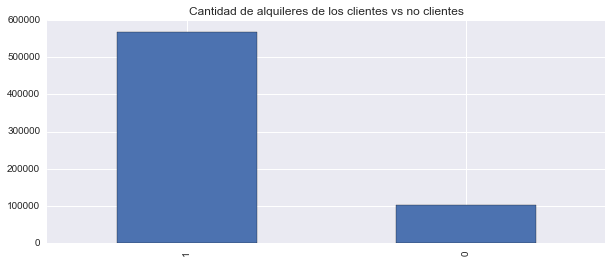

In [7]:
#Pregunta: cantidad de viajes que realizaron los clientes habituales
#y los no habituales
plt.title("Cantidad de alquileres de los clientes vs no clientes")
trips['type_num_subscription'].value_counts().plot(kind = 'bar', figsize = (10,4));

In [8]:
#Como hago para ponerle los labels?
 # en 1 iria Subscriber y en 0 customer

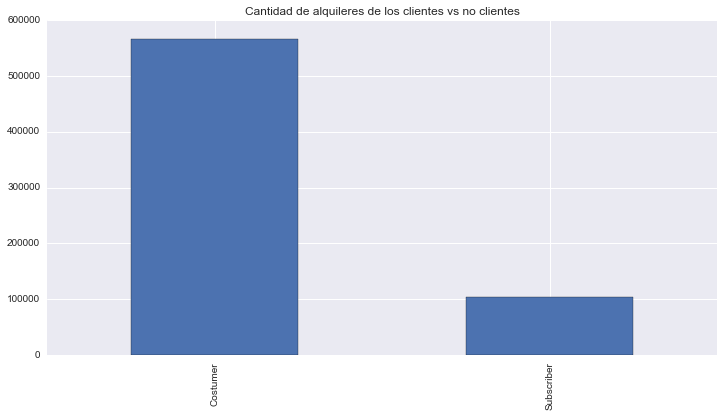

In [36]:
## Aca seria el posta
plt.title("Cantidad de alquileres de los clientes vs no clientes")
numSuscripcion.plot(kind = 'bar', figsize = (12,6));